# Testing functions in telo_tools for handling individual telomere length data

In [1]:
# enables access to directories/files
import os

# for handling data
import numpy as np
from numpy import array
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

# graphing
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# for loading telo data column containing individual telomere length values
from ast import literal_eval

# statistics
from scipy import stats

# accessing telo_tools module, which is in the parent directory, for testing
import sys 
sys.path.append('..')
import telo_tools

In [2]:
# fxn for reading files
# test_df['telo data'] = test_df['telo data'].apply(lambda row: np.array(literal_eval(row)))

## Test compiling individual telomere length data and generating data into a dataframe

In [19]:
# compiling test data from excel files into a dict
test_dict = telo_tools.generate_dictionary_for_telomere_length_data('.')

xyz9999_FD45.xlsx telomere data acquisition in progress..
xyz9999_L-180.xlsx telomere data acquisition in progress..
xyz9999_L-60.xlsx telomere data acquisition in progress..
Done collecting all telomere length excel files


In [23]:
# generating a pandas dataframe from the dict
timepoint_list = ['L-180', 'L-60', 'FD45', 'FD90', 'FD140', 'FD260', 'R+5', 'R+7', 'R+60', 'R+105', 'R+180', 'R+270']

test_df = telo_tools.make_dataframe_from_telomere_data_dict(test_dict, timepoint_list)
test_df.head(4)

,sample id,timepoint,telo data,telo means,Q1,Q2-3,Q4
0,9999,FD45,0 7458.0 1 9788.0 2 12234....,9261.618841,telos quartile 1 <0.25,telos quartile 2-3 >0.25 & <0.75,telos quartile 4 >0.75
1,9999,L-180,0 8421.0 1 10914.0 2 13383....,10317.742572,telos quartile 1 <0.25,telos quartile 2-3 >0.25 & <0.75,telos quartile 4 >0.75
2,9999,L-60,0 11208.0 1 10514.0 2 11833....,10801.377174,telos quartile 1 <0.25,telos quartile 2-3 >0.25 & <0.75,telos quartile 4 >0.75


## Test counting short/medium/long individual telomeres

In [8]:
# declaring a list of 
timepoint_list = ['L-180', 'L-60', 'FD45', 'FD90', 'FD140', 'FD260', 'R+5', 'R+7', 'R+60', 'R+105', 'R+180', 'R+270']

telo_tools.calculate_apply_teloQuartiles_dataframe(test_df, timepoint_list)

,sample id,timepoint,telo data,telo means,Q1,Q2-3,Q4
0,9999,L-180,0 8969.0 1 8973.0 2 11786....,10317.742572,[1380],[2760],[1380]
1,9999,L-60,0 8556.0 1 15465.0 2 10365....,10801.377174,[1328],[2460],[1732]
2,9999,FD45,0 8235.0 1 6624.0 2 10942....,9261.618841,[1970],[2769],[781]


## Test exploding individual telomere length measurements into the dataframe as rows

In [9]:
test_df2 = telo_tools.explode_individual_telos(test_df)

In [10]:
print(test_df2.shape)
test_df2.head(3)

(16560, 7)


,sample id,timepoint,telo means,Q1,Q2-3,Q4,individual telos
0,9999,FD45,9261.618841,telos quartile 1 <0.25,telos quartile 2-3 >0.25 & <0.75,telos quartile 4 >0.75,8235
1,9999,L-180,10317.742572,telos quartile 1 <0.25,telos quartile 2-3 >0.25 & <0.75,telos quartile 4 >0.75,8969
2,9999,L-60,10801.377174,telos quartile 1 <0.25,telos quartile 2-3 >0.25 & <0.75,telos quartile 4 >0.75,8556


In [22]:
import importlib
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Testing graphing by histogram

In [244]:
# ls '../../NASA repo/NASA-astronauts-telomeres-chromosomes/excel data/'

In [239]:
all_astros_df = pd.read_csv('../../NASA repo/NASA-astronauts-telomeres-chromosomes/excel data/exploded_telos_astros_df.csv')
all_astros_df.head(4)

,astro number,astro id,timepoint,flight status,telo means,telo data exploded
0,1,5163,L-270,Pre-Flight,87.672120,46.976278
1,1,5163,L-180,Pre-Flight,101.077756,102.388907
2,1,5163,L-60,Pre-Flight,128.599235,92.432342
3,1,5163,FD90,Mid-Flight,101.183129,89.224858


In [225]:
import math

In [258]:
def histogram_plot_groups(x=None, df=None, sample_id_col=None, groupby=None, 
                          num_samps_per_group=None, ordered_timepoint_list=None, n_bins=40):
    
    all_samples = list(df[sample_id_col].unique())
    group_df = df.groupby(groupby)
    
    for sample in all_samples:
        timepoint_telo_values_dict = {}
        
        plot_df = group_df.get_group(sample)
        plot_df = order_timepoint_col(plot_df, ordered_timepoint_list)

        sample_unique_timepoints = list(plot_df['timepoint'].unique())
        
        for timepoint in sample_unique_timepoints:
            
            sample_ID_complete = str(list(plot_df[sample_id_col].unique())[0]) + ' ' + str(timepoint)
            timepoint_telo_values_dict[sample_ID_complete] = plot_df[plot_df['timepoint'] == timepoint][x]
            
        if len(timepoint_telo_values_dict.keys()) > 1:
            
            n_rows = len(timepoint_telo_values_dict.keys()) / 2
            n_rows = int(math.ceil(n_rows))
  
            n_bins = n_bins
            fig, axes = plt.subplots(n_rows, 2, sharey=True, sharex=True, constrained_layout=True, figsize = (8, 6))
            sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})

            for ax, item in zip(axes.flatten(), timepoint_telo_values_dict.items()):

                name, data = item[0], item[1]
                initial_timepoint = timepoint_telo_values_dict[list(timepoint_telo_values_dict.keys())[0]]
                histogram_stylizer_divyBins_byQuartile(fig, ax, n_bins, data, initial_timepoint, f'{name}')
                


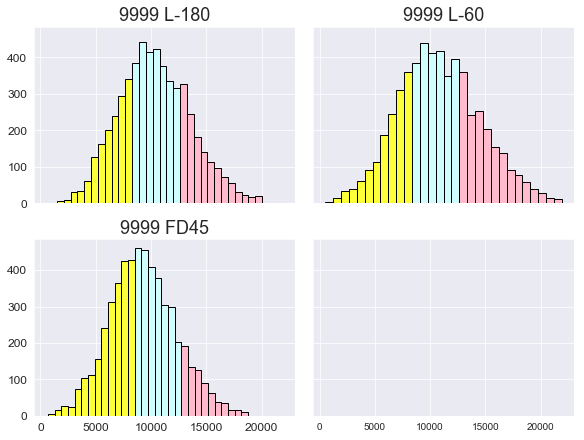

In [259]:
timepoint_list = ['L-180', 'L-60', 'FD45', 'FD90', 'FD140', 'FD260', 'R+5', 'R+7', 'R+60', 'R+105', 'R+180', 'R+270']

histogram_plot_groups(x='individual telos', df=test_df2, 
                      sample_id_col='sample id', groupby='sample id', 
                      num_samps_per_group=3, ordered_timepoint_list=timepoint_list)

In [255]:
def histogram_stylizer_divyBins_byQuartile(fig, ax, n_bins, data, initial_timepoint, name):

    data = data.to_numpy()
    initial_timepoint = initial_timepoint.to_numpy()

    N, bins, patches = ax.hist(data, bins=n_bins, edgecolor='black')

    for a in range(len(patches)):
        if bins[a] <= np.quantile(initial_timepoint, 0.25):
            patches[a].set_facecolor('#fdff38')

        elif np.quantile(initial_timepoint, 0.25) < bins[a] and bins[a] <= np.quantile(initial_timepoint, 0.50):
            patches[a].set_facecolor('#d0fefe')

        elif np.quantile(initial_timepoint, 0.50) < bins[a] and bins[a] <= np.quantile(initial_timepoint, 0.75):
            patches[a].set_facecolor('#d0fefe')

        elif bins[a] > np.quantile(initial_timepoint, 0.75): 
            patches[a].set_facecolor('#ffbacd')
            
    ax.set_title(f"{name}", fontsize=18,)
    ax.tick_params(labelsize=12)
#     ax.xaxis.set_major_locator(plt.MaxNLocator(12))

In [249]:
def order_timepoint_col(df, ordered_timepoint_list):
    df['timepoint'] = df['timepoint'].astype('category')
    df['timepoint'].cat.set_categories(ordered_timepoint_list, inplace=True)
    df = df.sort_values(['sample id', 'timepoint']).reset_index(drop=True).copy()
    
    return df